# Assignments for "Data Cleaning - Outliers"

In this assignment, you continue to study the data of the `US Education System`. Again, please down it from here ([dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home)). In this dataset, there is a lot of data on an annual basis. You can reach the explanations of this data from Kaggle again.

First of all, apply the most appropriate one of the techniques for completing the missing values in your previous lesson. In order to answer the following questions, you must overcome the missing data.

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("states_all.csv")
df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


**(1)** See `TOTAL_REVENUE`, which includes total revenue data, and `TOTAL_EXPENDITURE`, which includes total spending data. Do these variables contain outliers?

{'whiskers': [<matplotlib.lines.Line2D at 0x21a2d1434c8>,
 'caps': [<matplotlib.lines.Line2D at 0x21a2d157b48>,
 'boxes': [<matplotlib.lines.Line2D at 0x21a2d153348>],
 'medians': [<matplotlib.lines.Line2D at 0x21a2d15db48>],
 'fliers': [<matplotlib.lines.Line2D at 0x21a2d15dcc8>],
 'means': []}

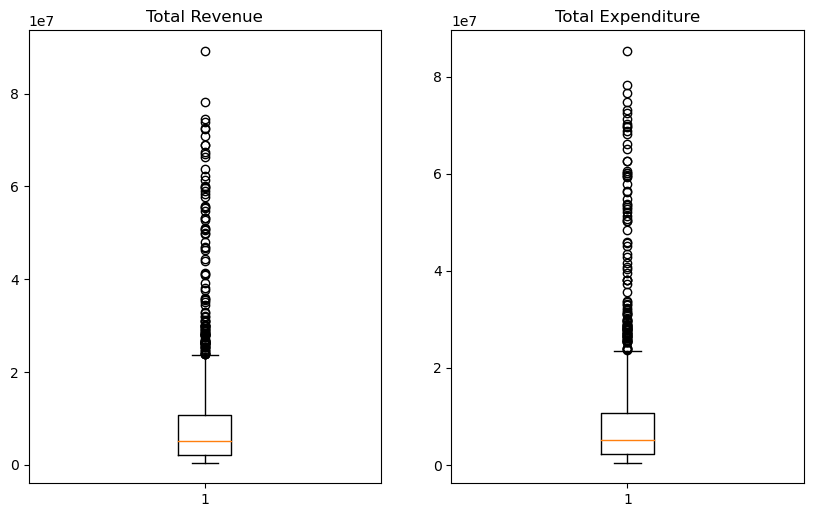

In [3]:
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,6),dpi=100)

plt.subplot(1,2,1)
plt.title("Total Revenue")
plt.boxplot(df["TOTAL_REVENUE"].dropna(),whis=1.5)

plt.subplot(1,2,2)
plt.title("Total Expenditure")
plt.boxplot(df["TOTAL_EXPENDITURE"].dropna(),whis=1.5)

**(2)** If you find outliers in the total income `TOTAL_REVENUE` and total expenditure `TOTAL_EXPENDITURE` variables, eliminate these outliers by applying the techniques you learned in this lesson and verify that no outliers remain after doing this.

In [4]:
from scipy.stats.mstats import winsorize

Revenue [ 2678885.  1049591.  3258079. ...  3391579. 11697466.  2044669.]
Expenditure [ 2653798.   972488.  3401580. ...  3366566. 11787535.  2034229.]


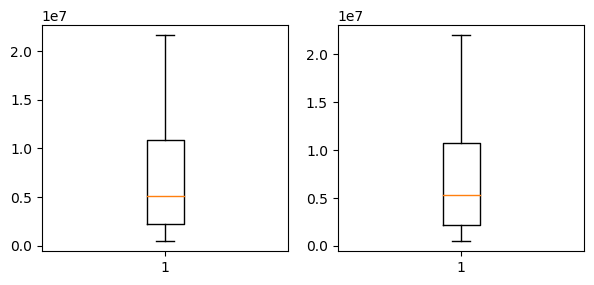

In [5]:
w_revenue=winsorize(df["TOTAL_REVENUE"].dropna(), (0,0.10))
w_expenditure=winsorize(df["TOTAL_EXPENDITURE"].dropna(), (0,0.10))

print("Revenue",w_revenue)
print("Expenditure",w_expenditure)

plt.figure(figsize=(7,3),dpi=100)
plt.subplot(1,2,1)
plt.boxplot(w_revenue, whis=1.5)
# whiskers 0.5 olunca outliers değerler var; 1.5 olunca da outliers değerlerden
# kurtuluruz.

plt.subplot(1,2,2)
plt.boxplot(w_expenditure)
plt.show()

**(3)** Subtract the total expenditure `TOTAL_EXPENDITURE` from the total income variable `TOTAL_REVENUE` to create a variable that can be considered as a budget deficit (without failing to contradict the outliers). Are there any outliers in this new variable? If any, clear these outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x21a451c7388>,
 'caps': [<matplotlib.lines.Line2D at 0x21a451db908>,
 'boxes': [<matplotlib.lines.Line2D at 0x21a451d8308>],
 'medians': [<matplotlib.lines.Line2D at 0x21a451e2788>],
 'fliers': [<matplotlib.lines.Line2D at 0x21a451e2e88>],
 'means': []}

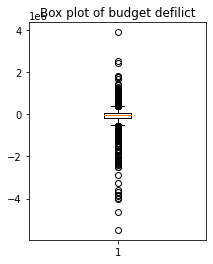

In [6]:
df["budget_deficit"] = df.TOTAL_REVENUE - df.TOTAL_EXPENDITURE
plt.figure(figsize=(7,4))
plt.subplot(121)
plt.title("Box plot of budget defilict")
plt.boxplot(df["budget_deficit"].dropna())

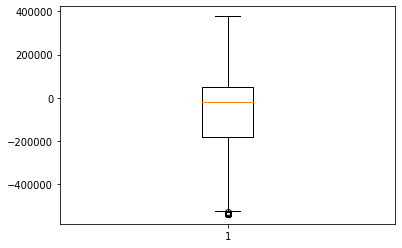

In [9]:
winsorized_budget_deficit = winsorize(df["budget_deficit"].dropna(),(0.088,0.07))
plt.boxplot(winsorized_budget_deficit)
plt.show()

**(4)** Again create a variable that can be considered as a budget deficit by subtracting the total income `TOTAL_REVENUE` variable from the total expenditure `TOTAL_EXPENDITURE`. But this time, after clearing the outliers, do this. Are there any outliers in this new variable? It is useful to clean them, if any.

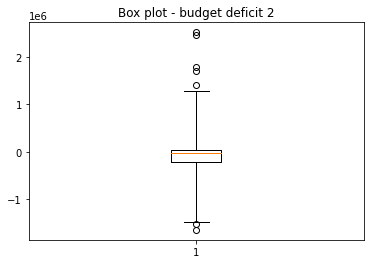

In [16]:
budget_deficit2 = w_revenue - w_expenditure

plt.boxplot(budget_deficit2, whis = 5)
plt.title("Box plot - budget deficit 2")
plt.show()

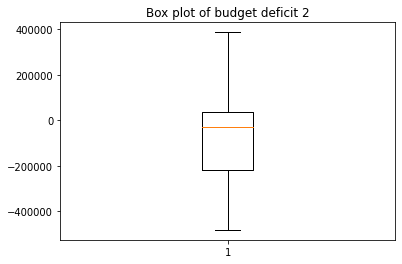

In [17]:
winsorize_budget2 = winsorize(budget_deficit2, (0.05, 0.05))

plt.boxplot(winsorize_budget2, whis = 5)
plt.title("Box plot of budget deficit 2")
plt.show()

**(5)** Now, we have two different budget variables that we have created in the third and fourth questions. Do you see the difference between these two?

In [22]:
df["budget_deficit"].describe()

count    1.275000e+03
mean    -1.041972e+05
std      5.743335e+05
min     -5.487742e+06
25%     -1.813080e+05
50%     -2.136800e+04
75%      5.162700e+04
max      3.897129e+06
Name: budget_deficit, dtype: float64

In [24]:
df_budget = pd.DataFrame(data = winsorized_budget_deficit) 
df_budget.describe()

,0
count,1275.000000
mean,-58882.717647
std,238526.364869
min,-538253.000000
25%,-181308.000000
50%,-21368.000000
75%,51627.000000
max,377833.000000


In [25]:
df_budget2 = pd.DataFrame(data = winsorize_budget2) 
df_budget2.describe()

,0
count,1275.000000
mean,-64108.446275
std,211686.393462
min,-482442.000000
25%,-218426.000000
50%,-28374.000000
75%,37054.000000
max,386711.000000


In [26]:
#There are differences between them, so the order of operation is important.

**(6)** If the budget deficit was a very important variable for us, which method would be better to clear out contrary values. Is it the method you applied in the third question or the method in the fourth question?

In [ ]:
#It is right that we create the necessary variable first. We can choose the method in question 3.